In [24]:
### Importing the dataset - in the form of batches - using dataloader package - mini batch descent - size =64
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
import numpy as np
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

In [25]:
def entropy_class_loss(self, Y, Y_hat):
        loss = -np.sum(Y * np.log(Y_hat)) / self.batch_size
        return loss

In [26]:
class MLP_Tanh:
    def __init__(self, input_layer_size=784, first_hidden_layer_size=500, 
                 second_hidden_layer_size=250, third_hidden_layer_size=100, 
                 output_layer_size=10, learning_rate=0.01, batch_size=64):
        
        self.input_layer_size = input_layer_size
        self.first_hidden_layer_size = first_hidden_layer_size
        self.second_hidden_layer_size = second_hidden_layer_size
        self.third_hidden_layer_size = third_hidden_layer_size
        self.output_layer_size = output_layer_size
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        
        self.W1 = np.random.uniform(-np.sqrt(6/(self.input_layer_size+self.first_hidden_layer_size)), 
                                    np.sqrt(6/(self.input_layer_size+self.first_hidden_layer_size)), 
                                    (self.input_layer_size, self.first_hidden_layer_size))
        self.b1 = np.zeros((1, self.first_hidden_layer_size))
        
        self.W2 = np.random.uniform(-np.sqrt(6/(self.first_hidden_layer_size+self.second_hidden_layer_size)), 
                                    np.sqrt(6/(self.first_hidden_layer_size+self.second_hidden_layer_size)), 
                                    (self.first_hidden_layer_size, self.second_hidden_layer_size))
        self.b2 = np.zeros((1, self.second_hidden_layer_size))
        
        self.W3 = np.random.uniform(-np.sqrt(6/(self.second_hidden_layer_size+self.third_hidden_layer_size)), 
                                    np.sqrt(6/(self.second_hidden_layer_size+self.third_hidden_layer_size)), 
                                    (self.second_hidden_layer_size, self.third_hidden_layer_size))
        self.b3 = np.zeros((1, self.third_hidden_layer_size))
        
        self.W4 = np.random.uniform(-np.sqrt(6/(self.third_hidden_layer_size+self.output_layer_size)), 
                                    np.sqrt(6/(self.third_hidden_layer_size+self.output_layer_size)), 
                                    (self.third_hidden_layer_size, self.output_layer_size))
        self.b4 = np.zeros((1, self.output_layer_size))

    def tanh(self, z):
        return np.tanh(z)
    
    def tanh_differentiated(self, z):
        return 1 - np.tanh(z) ** 2
    
    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)
    
    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.Activation_1 = self.tanh(self.z1)
        self.z2 = np.dot(self.Activation_1, self.W2) + self.b2
        self.Activation_2 = self.tanh(self.z2)
        self.z3 = np.dot(self.Activation_2, self.W3) + self.b3
        self.Activation_3 = self.tanh(self.z3)
        self.z4 = np.dot(self.Activation_3, self.W4) + self.b4
        self.Activation_4 = self.softmax(self.z4)
        return self.Activation_4
    
    def backward(self, X, Y):
        errorz4 = self.Activation_4 - Y
        partial_derivative_w_4 = np.dot(self.Activation_3.T, errorz4) / self.batch_size
        partial_derivative_b_4 = np.sum(errorz4, axis=0, keepdims=True) / self.batch_size

        errorz3 = np.dot(errorz4, self.W4.T) * self.tanh_differentiated(self.z3)
        partial_derivative_w_3 = np.dot(self.Activation_2.T, errorz3) / self.batch_size
        partial_derivative_b_3 = np.sum(errorz3, axis=0, keepdims=True) / self.batch_size
        
        errorz2 = np.dot(errorz3, self.W3.T) * self.tanh_differentiated(self.z2)
        partial_derivative_w_2 = np.dot(self.Activation_1.T, errorz2) / self.batch_size
        partial_derivative_b_2 = np.sum(errorz2, axis=0, keepdims=True) / self.batch_size
        
        errorz1 = np.dot(errorz2, self.W2.T) * self.tanh_differentiated(self.z1)
        partial_derivative_w_1 = np.dot(X.T, errorz1) / self.batch_size
        partial_derivative_b_1 = np.sum(errorz1, axis=0, keepdims=True) / self.batch_size

        self.W4 -= self.learning_rate * partial_derivative_w_4
        self.b4 -= self.learning_rate * partial_derivative_b_4
        self.W3 -= self.learning_rate * partial_derivative_w_3
        self.b3 -= self.learning_rate * partial_derivative_b_3
        self.W2 -= self.learning_rate * partial_derivative_w_2
        self.b2 -= self.learning_rate * partial_derivative_b_2
        self.W1 -= self.learning_rate * partial_derivative_w_1
        self.b1 -= self.learning_rate * partial_derivative_b_1

    def entropy_class_loss(self, Y, Y_hat):
        
        loss = -np.sum(Y * np.log(Y_hat)) / self.batch_size
        return loss


Current Iteration 200, Training Loss: 0.5401, Test Loss: 0.5204
Current Iteration 400, Training Loss: 0.4105, Test Loss: 0.3960
Current Iteration 600, Training Loss: 0.3610, Test Loss: 0.3448
Current Iteration 800, Training Loss: 0.3220, Test Loss: 0.3106
Epoch 1/15
Current Iteration 1000, Training Loss: 0.3036, Test Loss: 0.2951
Current Iteration 1200, Training Loss: 0.2818, Test Loss: 0.2726
Current Iteration 1400, Training Loss: 0.2668, Test Loss: 0.2576
Current Iteration 1600, Training Loss: 0.2546, Test Loss: 0.2477
Current Iteration 1800, Training Loss: 0.2471, Test Loss: 0.2425
Epoch 2/15
Current Iteration 2000, Training Loss: 0.2363, Test Loss: 0.2334
Current Iteration 2200, Training Loss: 0.2303, Test Loss: 0.2294
Current Iteration 2400, Training Loss: 0.2222, Test Loss: 0.2209
Current Iteration 2600, Training Loss: 0.2109, Test Loss: 0.2095
Current Iteration 2800, Training Loss: 0.2078, Test Loss: 0.2079
Epoch 3/15
Current Iteration 3000, Training Loss: 0.2016, Test Loss: 0.2

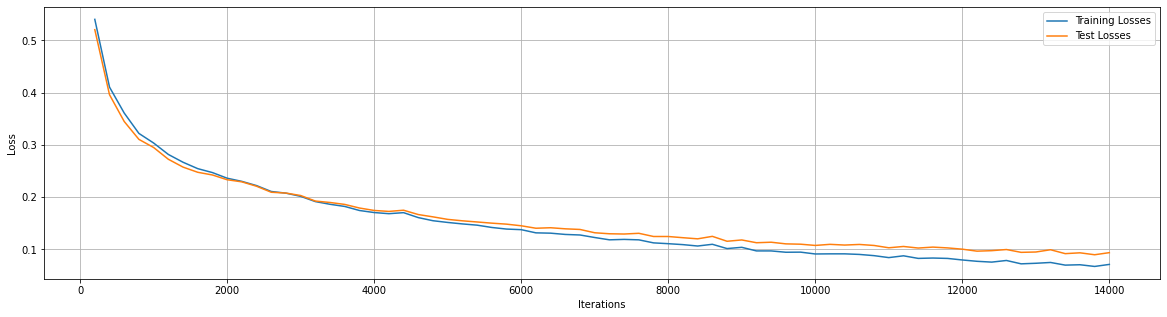

In [27]:
def train(model, train_loader, test_loader, epochs, plot_interval=200):
    training_loss_list = []
    test_loss_list = []
    iteration_counts = []
    
    current_iteration = 0
    
    for epoch in range(epochs):
        for batch_idx, (images, labels) in enumerate(train_loader):
            X = images.view(-1, 28*28).numpy()
            Y = np.eye(10)[labels]
            Y_hat = model.forward(X)
            loss = model.entropy_class_loss(Y, Y_hat)
            model.backward(X, Y)
            current_iteration += 1
            if current_iteration % plot_interval == 0:
                iteration_counts.append(current_iteration)
                total_train_loss = 0
                total_train_samples = 0
                for train_images, train_labels in train_loader:
                    X_train = train_images.view(-1, 28*28).numpy()
                    Y_train = np.eye(10)[train_labels]
                    Y_train_hat = model.forward(X_train)
                    total_train_loss += model.entropy_class_loss(Y_train, Y_train_hat) * X_train.shape[0]
                    total_train_samples += X_train.shape[0]
                avg_train_loss = total_train_loss / total_train_samples
                training_loss_list.append(avg_train_loss)

                total_test_loss = 0
                total_test_samples = 0
                for test_images, test_labels in test_loader:
                    X_test = test_images.view(-1, 28*28).numpy()
                    Y_test = np.eye(10)[test_labels]
                    Y_test_hat = model.forward(X_test)
                    total_test_loss += model.entropy_class_loss(Y_test, Y_test_hat) * X_test.shape[0]
                    total_test_samples += X_test.shape[0]
                avg_test_loss = total_test_loss / total_test_samples
                test_loss_list.append(avg_test_loss)
                
                print(f'Current Iteration {current_iteration}, Training Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}')
        
        print(f'Epoch {epoch+1}/{epochs}')

    plt.figure(figsize=(20, 5))
    plt.plot(iteration_counts, training_loss_list, label='Training Losses')
    plt.plot(iteration_counts, test_loss_list, label='Test Losses')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
   
    plt.legend()
    plt.grid(True)
    plt.show()


model = MLP_Tanh()
train(model, train_loader, test_loader, epochs=15)


In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
def final_test(model, test_loader):
    all_preds = []
    all_labels = []
    for images, labels in test_loader:
        X = images.view(-1, 28*28).numpy()  
        Y_hat = model.forward(X)
        preds = np.argmax(Y_hat, axis=1)  
        all_preds.append(preds)
        all_labels.append(labels.numpy())  
    all_preds = np.concatenate(all_preds)
    all_labels = np.concatenate(all_labels)
    accuracy = accuracy_score(all_labels, all_preds)
    print(f'Final Test Accuracy: {accuracy * 100:.2f}%')
    conf_matrix = confusion_matrix(all_labels, all_preds)
    print('Confusion Matrix:\n', conf_matrix)
    plt.figure(figsize=(20, 17))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()


Final Test Accuracy: 97.21%
Confusion Matrix:
 [[ 970    0    1    1    0    3    2    1    2    0]
 [   0 1122    3    1    0    1    4    2    2    0]
 [   4    0 1008    2    2    0    2    9    5    0]
 [   1    0   10  978    0    1    0   14    6    0]
 [   1    0    4    0  968    0    1    3    1    4]
 [   6    1    1   10    2  854    8    0    7    3]
 [   5    3    2    0    5    6  932    1    4    0]
 [   0    5    9    2    1    1    0 1008    0    2]
 [   3    0    3   11    4    3    4    8  936    2]
 [   4    5    2    6   26    0    1   17    3  945]]


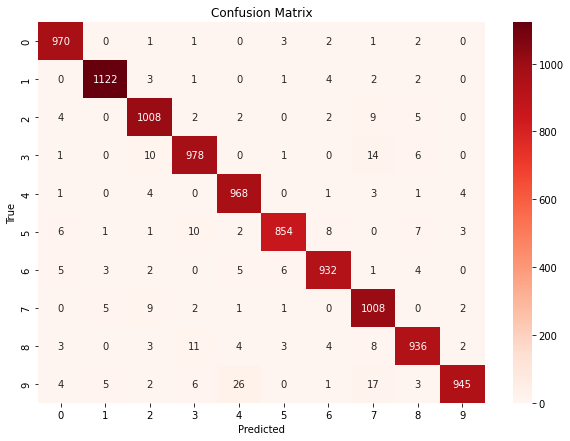

In [29]:
final_test(model,test_loader)

Final Test Accuracy: 97.95%
Confusion Matrix:
 [[5857    1    9    4    4    7   17    9   10    5]
 [   1 6663   33    2   13    0    3   21    5    1]
 [   9    5 5875    5   13    1    7   28   14    1]
 [   6    7   55 5958    2   19    5   42   28    9]
 [   2    7   12    0 5773    1   14   14    4   15]
 [  10    7   10   47   13 5260   34   11   20    9]
 [  22    4    5    0   10   10 5855    1   11    0]
 [   2   11   26    2   19    0    0 6195    2    8]
 [  10   23   17   24   13   11   15    7 5719   12]
 [  13    9    2   20  149    7    1  114   16 5618]]


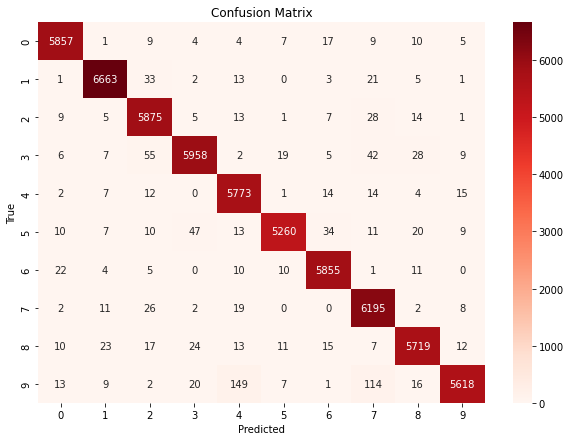

In [30]:
final_test(model,train_loader)